In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
user_train_label = pd.read_csv(r'C:\Users\user\Desktop\work\AI_study\korea_univ_std\ETRI_human\data\2024_data\train_label.csv')

user02_train_label = user_train_label[user_train_label['subject_id']=='user02']

In [16]:
user02_train_label.drop(columns='datetime', inplace=True)

In [20]:
user02_train_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 23 to 49
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  27 non-null     int64 
 1   subject_id  27 non-null     object
 2   date        27 non-null     object
 3   Q1          27 non-null     int64 
 4   Q2          27 non-null     int64 
 5   Q3          27 non-null     int64 
 6   S1          27 non-null     int64 
 7   S2          27 non-null     int64 
 8   S3          27 non-null     int64 
 9   S4          27 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 3.4+ KB


In [22]:
user02_train_label['datetime'] = pd.to_datetime(user_train_label['date'])
user02_train_label['datetime'] = user02_train_label['datetime'].values.astype(np.int64)

In [ ]:
'''
folder 14
day 27
label row 27

1598799600 - 1598882340

1598929200

user02 폴더에서 datetime int 별 train label의 datetime 과 매핑

- label 모두 합치기

- datetime 맞추어 데이터 interpolation

label 부터 


'''


In [27]:
user02_path = r'C:\Users\user\Desktop\work\AI_study\korea_univ_std\ETRI_human\data\2024_data\train_dataset\user01-06\user01-06\user02'
user02_date_files = os.listdir(user02_path)

user02_date_files

['1598799600',
 '1598886000',
 '1598972400',
 '1599058800',
 '1599146220',
 '1599893100',
 '1599922800',
 '1600592340',
 '1600614000',
 '1600700400',
 '1600786800',
 '1600961640',
 '1601046000',
 '1601132400']

In [73]:
user02_labeldt = pd.DataFrame()

for labels in user02_date_files:
    label_path = user02_path +r'\\' + labels
    
    csv_files = [file for file in os.listdir(label_path) if file.endswith('.csv')]
    
    label_path = label_path+r'\\'+csv_files[0]

    temp_df = pd.read_csv(label_path)
    
    # print(temp_df.head())
    # 읽은 데이터를 user02_labedt DataFrame에 추가
    user02_labeldt = pd.concat([user02_labeldt, temp_df], ignore_index=True)
        
    # pd.concat(user02_labedt,pd.read_csv(label_path+r'\\'+csv_files))
    # print(csv_files)

In [ ]:
user02_train_label['datetime_02'] = user02_train_label['datetime']//1000000000

In [74]:
user02_labeldt.head()

,ts,action,actionOption,actionSub,actionSubOption,condition,conditionSub1Option,conditionSub2Option,place,emotionPositive,emotionTension,activity
0,1.598800e+09,sleep,111,NaN,NaN,ALONE,NaN,NaN,home,4,3,3
1,1.598800e+09,sleep,111,NaN,NaN,ALONE,NaN,NaN,home,4,3,3
2,1.598800e+09,sleep,111,NaN,NaN,ALONE,NaN,NaN,home,4,3,3
3,1.598800e+09,sleep,111,NaN,NaN,ALONE,NaN,NaN,home,4,3,3
4,1.598800e+09,sleep,111,NaN,NaN,ALONE,NaN,NaN,home,4,3,3


In [78]:
user02_labeldt['date'] = pd.to_datetime(user02_labeldt['ts'], unit='s').dt.strftime('%Y-%m-%d')
user02_labeldt['date'] = pd.to_datetime(user02_labeldt['date'])

In [90]:
user02_labeldt_scope = user02_labeldt[(user02_labeldt['date']>='2020-08-31') & (user02_labeldt['date']<='2020-09-25')]

In [83]:
user02_train_label.head()

,Unnamed: 0,subject_id,date,Q1,Q2,Q3,S1,S2,S3,S4,datetime,datetime_02
23,23,user02,2020-08-31,0,0,0,0,1,1,1,1598832000000000000,1598832000
24,24,user02,2020-09-01,0,0,0,0,1,1,1,1598918400000000000,1598918400
25,25,user02,2020-09-02,1,0,0,0,0,0,1,1599004800000000000,1599004800
26,26,user02,2020-09-03,0,0,0,0,1,1,1,1599091200000000000,1599091200
27,27,user02,2020-09-04,1,1,0,0,1,0,1,1599177600000000000,1599177600


In [97]:
user02_train_label['date'] = pd.to_datetime(user02_train_label['date'])

In [100]:
user02_train_label.columns

Index(['Unnamed: 0', 'subject_id', 'date', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3',
       'S4', 'datetime', 'datetime_02'],
      dtype='object')

In [104]:
label_columns = ['date', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'S4']


In [ ]:
user02_labeldt_scope.drop(columns='ts',inplace=True)


In [130]:
user02_labeldt_scope['date'].unique()

array(['2020-08-31T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-09-02T00:00:00.000000000', '2020-09-03T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2020-09-12T00:00:00.000000000',
       '2020-09-13T00:00:00.000000000', '2020-09-20T00:00:00.000000000',
       '2020-09-21T00:00:00.000000000', '2020-09-22T00:00:00.000000000',
       '2020-09-23T00:00:00.000000000', '2020-09-24T00:00:00.000000000',
       '2020-09-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [131]:
user02_train_label[label_columns]['date'].unique()

array(['2020-08-31T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-09-02T00:00:00.000000000', '2020-09-03T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2020-09-05T00:00:00.000000000',
       '2020-09-06T00:00:00.000000000', '2020-09-07T00:00:00.000000000',
       '2020-09-08T00:00:00.000000000', '2020-09-09T00:00:00.000000000',
       '2020-09-10T00:00:00.000000000', '2020-09-11T00:00:00.000000000',
       '2020-09-12T00:00:00.000000000', '2020-09-13T00:00:00.000000000',
       '2020-09-14T00:00:00.000000000', '2020-09-15T00:00:00.000000000',
       '2020-09-16T00:00:00.000000000', '2020-09-17T00:00:00.000000000',
       '2020-09-18T00:00:00.000000000', '2020-09-19T00:00:00.000000000',
       '2020-09-20T00:00:00.000000000', '2020-09-21T00:00:00.000000000',
       '2020-09-22T00:00:00.000000000', '2020-09-23T00:00:00.000000000',
       '2020-09-24T00:00:00.000000000', '2020-09-25T00:00:00.000000000',
       '2020-09-26T00:00:00.000000000'], dtype='dat

In [132]:
# 'date'를 기준으로 두 데이터프레임을 합치기
combined_df = pd.merge(user02_labeldt_scope, user02_train_label[label_columns], on='date', how='inner')

# 결측값을 앞 데이터와 뒤 데이터로부터 채우기
combined_df.fillna(method='ffill', inplace=True)
# combined_df.fillna(method='bfill', inplace=True)  # 앞에서 채우지 못한 부분을 뒤에서 채우기


In [133]:
combined_df.to_csv(r'C:\Users\user\Desktop\work\AI_study\korea_univ_std\ETRI_human\test_code\my_test_model\combined01.csv')

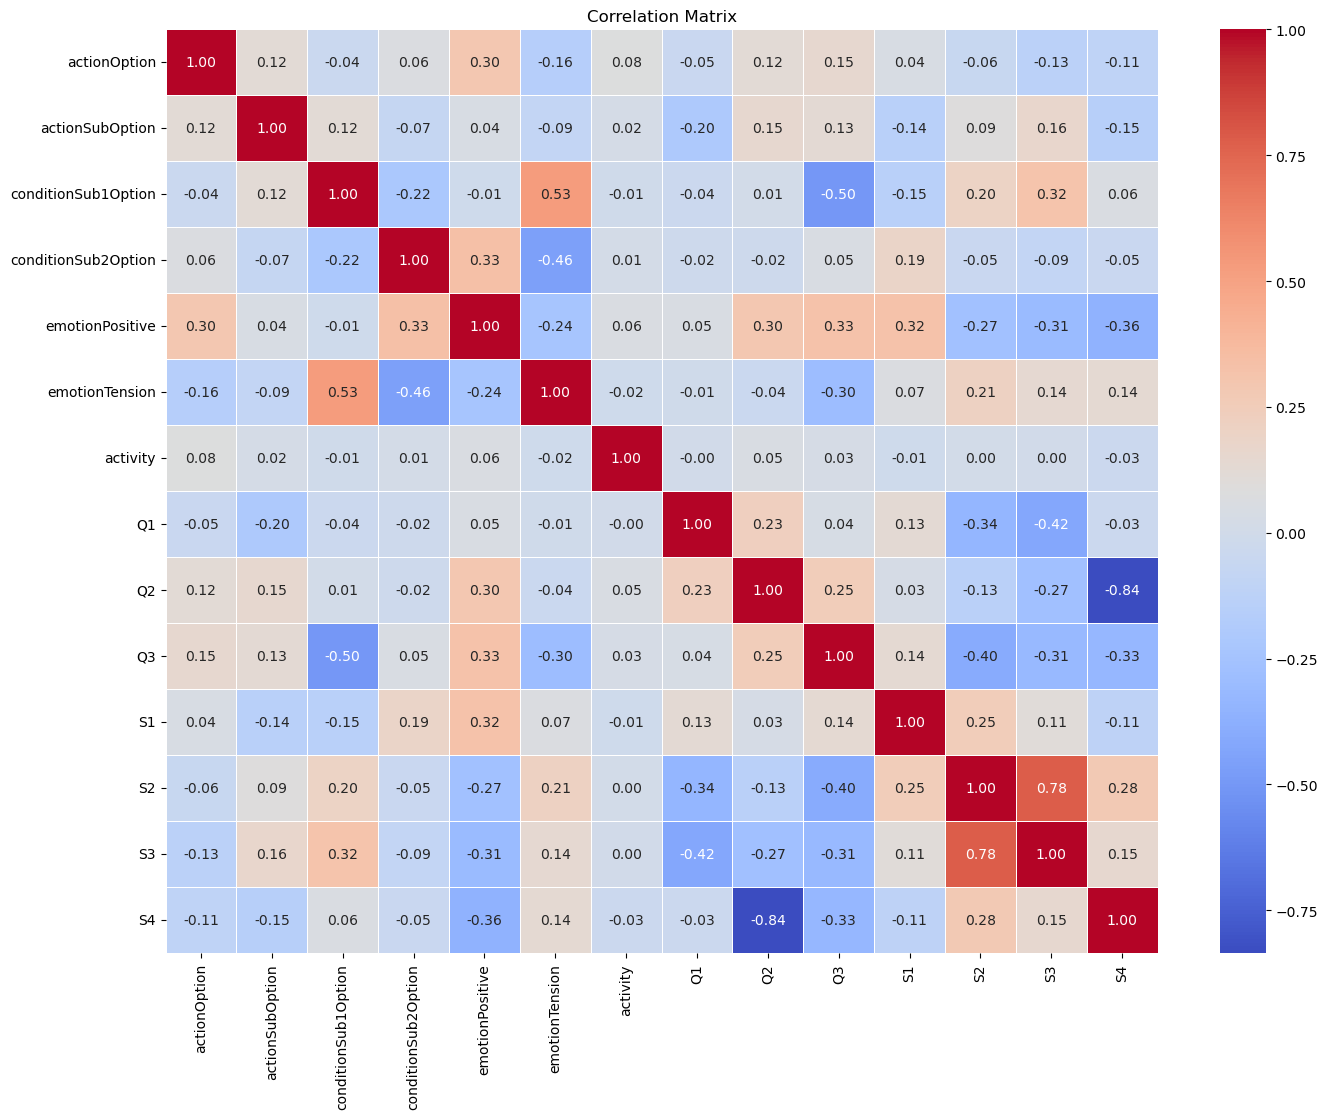

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
# combined_df.columns
# 상관 행렬 계산
corr_matrix = combined_df[combined_df.columns].corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### user_train_label 데이터 상관분석

- conditionSub1Option - Q3(-0.5), S3(0.32)
- emotionPositive - Q2(0.3), Q3(0.33),S1(0.32),S3(-0.31),S4(-0.36)
- emotionTension - Q3(-0.3)


In [139]:
combined_df_dummies.columns

Index(['actionOption', 'actionSubOption', 'conditionSub1Option',
       'conditionSub2Option', 'emotionPositive', 'emotionTension', 'activity',
       'date', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'S4', 'action_household',
       'action_meal', 'action_personal_care', 'action_recreation_etc',
       'action_recreation_media', 'action_sleep', 'action_socialising',
       'action_study', 'action_travel', 'action_work', 'actionSub_meal_amount',
       'actionSub_move_method', 'condition_ALONE', 'condition_WITH_MANY',
       'condition_WITH_ONE', 'place_home', 'place_other_indoor',
       'place_outdoor', 'place_restaurant', 'place_workplace'],
      dtype='object')

In [ ]:
combined_df_dummies = pd.get_dummies(combined_df)

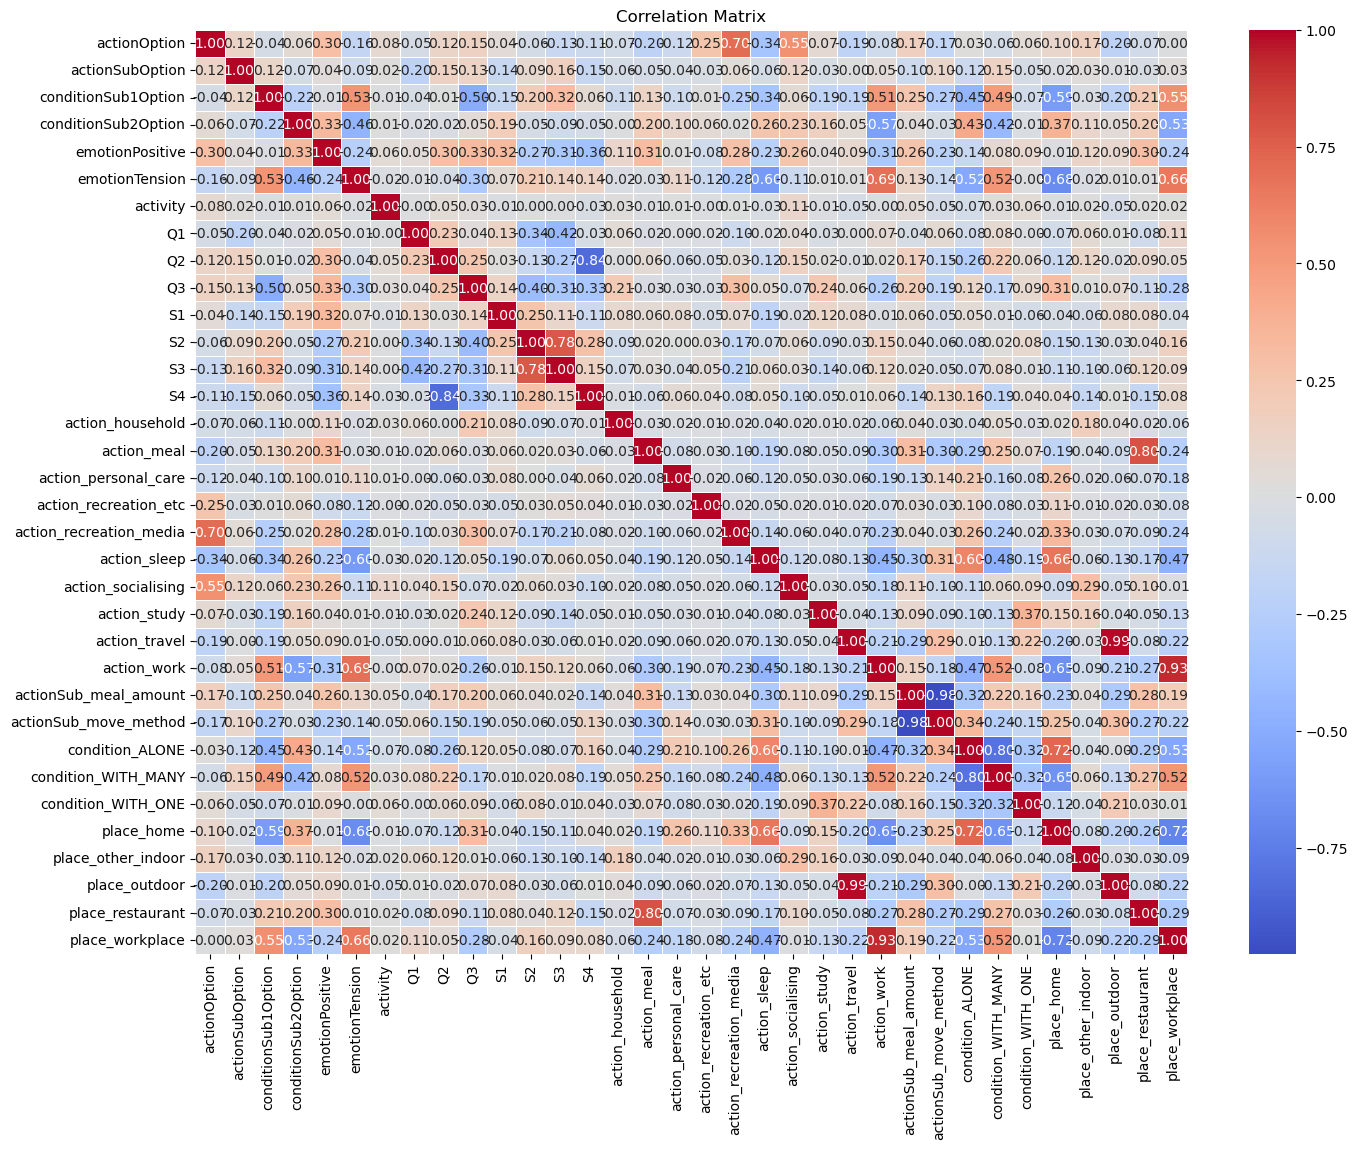

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
# combined_df.columns
# 상관 행렬 계산
corr_matrix = combined_df_dummies[combined_df_dummies.columns].corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

